In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

mnist_784 = fetch_openml("mnist_784")
mnist_784.keys()

X, Y = mnist_784['data'], mnist_784['target']
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


(70000, 784)
(70000,)


In [7]:

# Regularization constant search space
C = [0.01, 0.1, 1, 10, 100]
params = dict(C = C)

# Model with l1 regularization
    
log_reg_model1 = LogisticRegression(penalty = 'l1', multi_class = 'multinomial', solver = 'saga')

model1 = GridSearchCV(log_reg_model1, params, cv = 3, verbose = 1)
model1.fit(X_train, Y_train)

# View best hyperparameters
print('Best C for l1 regularization:', model1.best_estimator_.get_params()['C'])

# Training  and test loss with l1 regularization
Y_pred_train_l1 = model1.predict_proba(X_train)
Y_pred_test_l1 = model1.predict_proba(X_test)

print ('The training loss with l1 regularization is - ', log_loss(Y_train, Y_pred_train_l1))
print ('The test loss with l1 regularization is - ', log_loss(Y_test, Y_pred_test_l1))
print('The accuracy score for model1 is ', model1.score(X_test, Y_test)) 


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Convergence

Best C for l1 regularization: 100
The training loss with l1 regularization is -  0.27263969539316607
The test loss with l1 regularization is -  0.28656433241230866
The accuracy score for model1 is  0.9199428571428572


In [8]:
# Model with l2 regularization

log_reg_model2 = LogisticRegression(penalty = 'l2', multi_class = 'multinomial', solver = 'saga')


model2 = GridSearchCV(log_reg_model2, params, cv = 3, verbose = 1)
model2.fit(X_train, Y_train)

# View best hyperparameters
print('Best C for l2 regularization:', model2.best_estimator_.get_params()['C'])


# Training and test loss with l2 regularization
Y_pred_train_l2 = model2.predict_proba(X_train)
Y_pred_test_l2 = model2.predict_proba(X_test)

print ('The training loss with l2 regularization is - ', log_loss(Y_train, Y_pred_train_l2))
print ('The test loss with l2 regularization is - ', log_loss(Y_test, Y_pred_test_l2))
print('The accuracy score for model2 is ', model2.score(X_test, Y_test)) 


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Convergence

Best C for l2 regularization: 100
The training loss with l2 regularization is -  0.27265113615156944
The test loss with l2 regularization is -  0.28665515352264576
The accuracy score for model2 is  0.9198285714285714


In [11]:
#Part d)
#Checking for sparse solution with l1 regularization by retaining the accuracy

from sklearn.linear_model import LogisticRegressionCV
log_reg_model1_sparse = {}
C = [100.0]
dict_C_loss = {}
dict_C_accuracy = {}
dict_C_coef = {}
index = 0


while (C[0] >= 0.01):
  log_reg_model1_sparse[index] = LogisticRegressionCV(Cs = C, penalty = 'l1', multi_class = 'multinomial', solver = 'saga', cv = 3)
  log_reg_model1_sparse[index].fit(X_train, Y_train)
  Y_pred_test_l1 = log_reg_model1_sparse[index].predict_proba(X_test)
  dict_C_loss[C[0]] = log_loss(Y_test, Y_pred_test_l1)
  dict_C_accuracy[C[0]] = log_reg_model1_sparse[index].score(X_test, Y_test)
  dict_C_coef[C[0]] =  log_reg_model1_sparse[index].coef_
  print('With l1 regularization and C = ', C[0], ', the accuracy is ', log_reg_model1_sparse[index].score(X_test, Y_test))
  C[0] = C[0]/10
  index = index + 1





/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  100.0 , the accuracy is  0.9219428571428572


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  10.0 , the accuracy is  0.9218857142857143


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  1.0 , the accuracy is  0.9217142857142857


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  0.1 , the accuracy is  0.9210857142857143


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  0.01 , the accuracy is  0.9076571428571428


Our best C was 100 from the previous calculation for l1 regularization. Currently our accuracy with C=100 is 0.92194 (here, the accuracy changed by a tiny fraction because of the randomness, but we will still consider this as our basis). After running logistic regression with l1 norm and cross validation for C less than 100, it can be seen that by replacing C with 0.1, our accuracy is not affected significantly and its value is equal to 0.92108. Hence with C = 0.1, we can get sparse solution. 

In [2]:
from sklearn.linear_model import LogisticRegressionCV
best_sparse_solution_l1 = LogisticRegressionCV(Cs = [.1], penalty = 'l1', multi_class = 'multinomial', solver = 'saga', cv = 3)
best_sparse_solution_l1.fit(X_train, Y_train)
print('Thus best sparse logistic regression model solution with l1 norm and accuracy 0.92108 is -', best_sparse_solution_l1)

/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Thus best sparse logistic regression model solution with l1 norm and accuracy 0.92108 is - LogisticRegressionCV(Cs=[0.1], class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='saga', tol=0.0001, verbose=0)


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [7]:
from collections import Counter
count = np.count_nonzero(best_sparse_solution_l1.coef_ == 0)
print ('Number of zeros in the coefficients of best sparse model with l1 norm -', count)

Number of zeros in the coefficients of best sparse model with l1 norm - 3194


(10, 784)


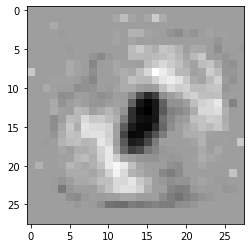

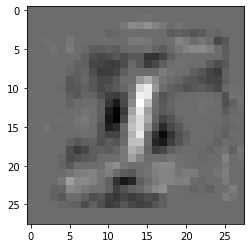

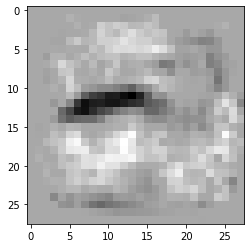

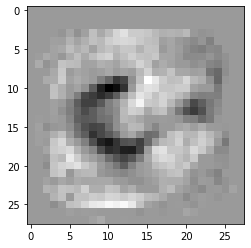

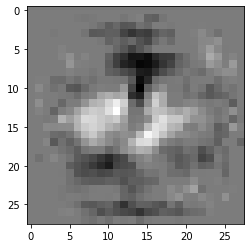

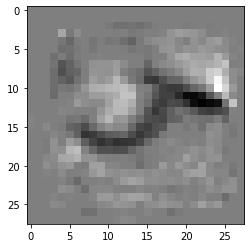

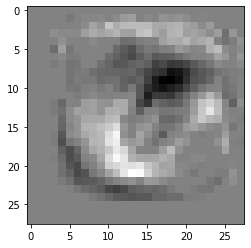

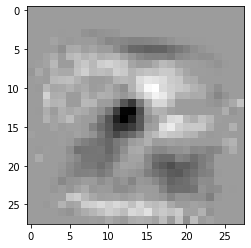

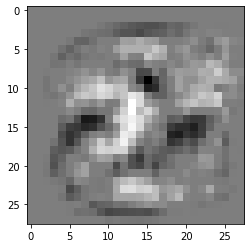

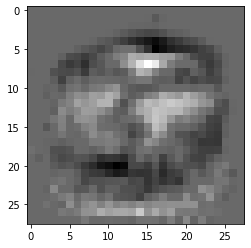

In [13]:
# Part (e)
# Displaying mnist images with the coeff of sparser solution
import matplotlib.pyplot as plt 
best_coef = dict_C_coef[0.1]
print (best_coef.shape)


for i in range(10):
  plt.imshow(best_coef[i].reshape((28, 28)), cmap='gray')
  plt.show()
